In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
def data_generator(numClasses, numElems):
    data = np.empty((sum(numElems), 2))
    target = np.empty(sum(numElems))
    
    for cl,n in zip(list(range(numClasses)), numElems):
        start_pos = sum(numElems[:cl])
        
        x_c, y_c = random.random()*5, random.random()*5
        data[start_pos:start_pos+n,:] = np.random.normal([x_c,y_c], 0.5, (n, 2))
        target[start_pos:start_pos+n] = np.full(n, cl)
        
    return data, target

In [3]:
data, target = data_generator(3, [100,100,100])

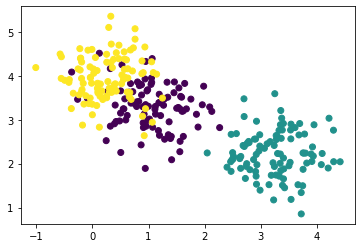

In [4]:
plt.scatter(data[:,0], data[:,1], c=target)

In [5]:
from sklearn.model_selection import train_test_split

In [10]:
train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.1, shuffle=True)
import operator
from collections import Counter

In [35]:
class KNN:
    def __init__(self, k):
        self.k = k
    def dist (self,x,y):
        return np.sqrt(np.sum((x-y)**2)) 
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        self.num_class = np.unique(y_train).shape[0]
    def predict(self, X_test):
        y_pred=[]
        d=[self.dist(X_test, X_train) for X_train in self.X_train]
        k=np.argsort(d)[:self.k]
        neigh=[self.y_train[i] for i in k]
        y_pred=Counter(neigh).most_common(1)
        return y_pred[0][0]
    def lst(self, X_test):
        y_pred=[self.predict(x) for x in X_test]
        return np.array(y_pred)

In [36]:
from sklearn.metrics import accuracy_score
import pandas

In [37]:
a=KNN(3)
a.fit(train_data,train_target)
y_pred=a.lst(test_data)
score = accuracy_score(test_target, y_pred)
score

1.0